<a href="https://colab.research.google.com/github/Auta01/Pytorch/blob/main/Pytorch_computer_vision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchvision

In [2]:
#Importing computer vision libaries
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [3]:
#Getting dataset from fashionmnist
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download =True,
    transform = ToTensor(),
    target_transform=None
)

test_data =datasets.FashionMNIST(
    root='data',
    train = False,
    download =True,
    transform = ToTensor(),
    target_transform =None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.61MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names =train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
#check our image shape
image_shape, label = train_data[0]
image_shape
print(f'Image shape:{image_shape.shape}-> [color_channeles,height, width]')
print(f'Image label:{class_names[label]}')

Image shape:torch.Size([1, 28, 28])-> [color_channeles,height, width]
Image label:Ankle boot


Image shape:[Image.shape]


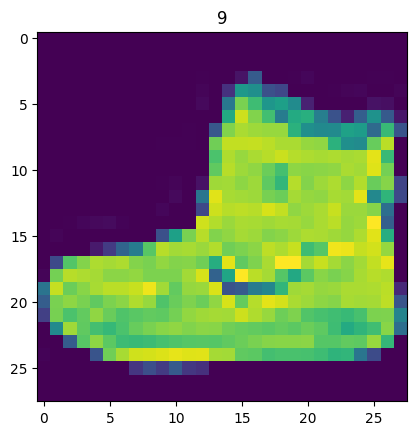

In [9]:
#Visalizing the image
import matplotlib.pyplot as plt
image, label =train_data[0]
print(f'Image shape:[Image.shape]')
plt.imshow(image.squeeze())
plt.title(label);

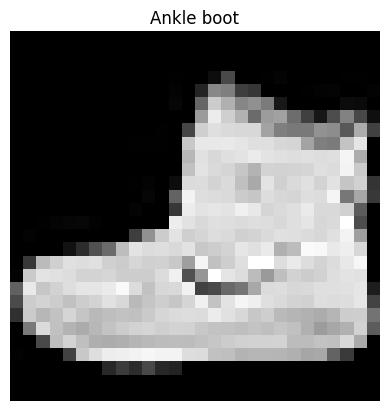

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

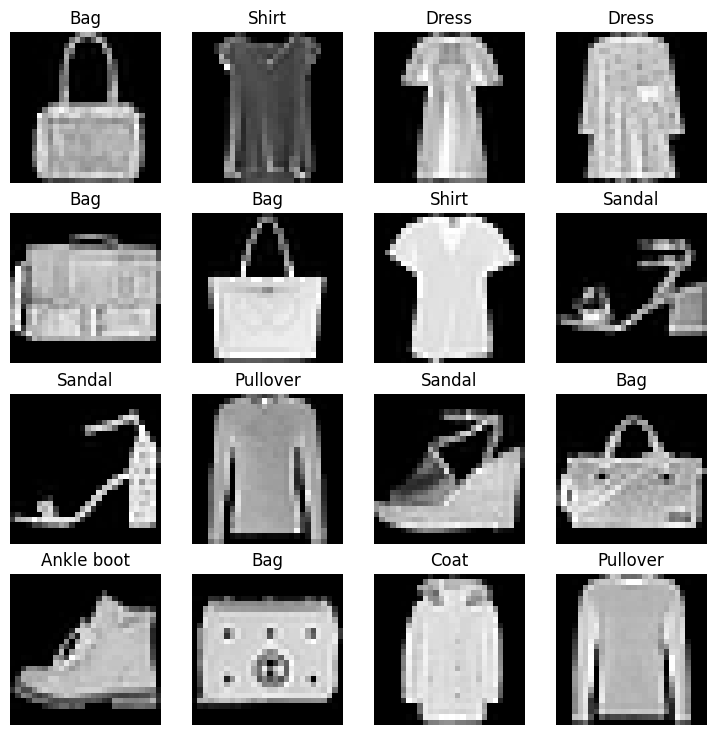

In [11]:
#plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols =4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False);

In [12]:
#prepare dataloader
from torch.utils.data import DataLoader

#setup the batch size hyperparametter
BATCH_SIZE =32

#turn dataset into iterable
train_dataloader =DataLoader(dataset =train_data,
                             batch_size =BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle =False)

In [13]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f67fda58d70>,
 <torch.utils.data.dataloader.DataLoader at 0x7f67fdaa4350>)

In [14]:
#lets check out what we have created
print(f'DataLoader:{train_dataloader, test_dataloader}')
print(f'Length of train_dataloader:{len(train_dataloader)}batches of{BATCH_SIZE}')
print(f'Length of test_dataloader:{len(test_dataloader)}batches of{BATCH_SIZE}')


DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x7f67fda58d70>, <torch.utils.data.dataloader.DataLoader object at 0x7f67fdaa4350>)
Length of train_dataloader:1875batches of32
Length of test_dataloader:313batches of32


In [20]:
#check out what is inside the training dataloader
train_features_batch, train_labels_batch =next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape:torch.Size([1, 28, 28])
label:3,label size:torch.Size([])


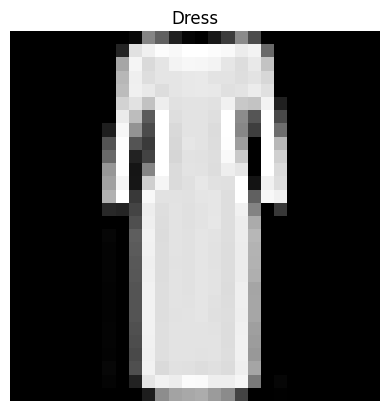

In [37]:
#show a sample
#torch.manual_seed(42)
random_idx =torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image shape:{img.shape}')
print(f'label:{label},label size:{label.shape}')

In [38]:
# Build a baseline model
# create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x =train_features_batch[0]
#flatten the sample
output = flatten_model(x)
#print out what happen
print(f'shape before flattening: {x.shape}')
print(f'shape after flattening: {output.shape}')

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [49]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features =input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
        )

  def forward(self, x):
    return self.layer_stack(x)

In [45]:
#setup model with input parameters
model_0 =FashionMNISTModelV0(
    input_shape =28*28,
    hidden_units =10,
    output_shape=len(class_names)
)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [46]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [56]:
# set loss functin and optimizer
import requests
from pathlib import Path
#Download helper function from learn pytorch repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download.....')
else:
  print('downloading helper_function.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

downloading helper_function.py


In [60]:
#import accuracy metrics
from helper_functions import accuracy_fn

In [61]:
#set loss_fn and optimizer
los_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params =model_0.parameters(),
                            lr=0.01)

In [62]:
#Create a funtion to time our experiment
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device =None):
  total_time = end-start
  print(f'Train time on {device}: {total_time:.3f}second')
  return total_time

In [63]:
start_time =timer()
end_time=timer()
print_train_time(start=start_time, end=end_time )

Train time on None: 0.000second


4.8349999815400224e-05